In [23]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.animation as animation
import numpy as np
import math
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.base import BaseEstimator, ClassifierMixin

In [2]:
from sklearn.svm import SVC

In [3]:
import optuna

C:\Users\Samsung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import warnings

In [43]:
from sklearn.metrics import accuracy_score

In [98]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [6]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
#warnings.filterwarnings("ignore", category=DataConversionWarning)

# Normalizador

In [15]:
class Nomalizer:
    def __init__(self):
        self.y_max=0.0
        self.y_min=0.0
        self.x_max=[]
        self.x_min=[]

    def fit(self,x,y):
        # Pega os valores minimos de 
        self.y_max=y['y'].max().tolist()
        self.y_min=y['y'].min().tolist()

        # Pega os valores maximos e minimos do X
        self.x_max=x.max().tolist()
        self.x_min=x.min().tolist()
    
    def normalize(self,x):
        #y_norm=y.map(self.y_norm_aux)
        x_norm=x.copy()
        norm_index=0
        for column in x.columns:
            x_column=[]
            for i in range(len(x[column])):
                x_column.append((x[column][i]-self.x_min[norm_index])/(self.x_max[norm_index]-self.x_min[norm_index]))
                
            norm_index+=1
            x_norm[column]=x_column    
        
        return x_norm#,y_norm
    
    def desnormalize(self,x_norm):
        #y=y_norm.map(self.y_desnorm_aux)
        x=x_norm.copy()
        norm_index=0
        for column in x_norm.columns:
            x_column=[]
            for i in range(len(x_norm[column])):
                x_column.append((x_norm[column][i]*(self.x_max[norm_index]-self.x_min[norm_index]))+self.x_min[norm_index])
                
            norm_index+=1
            x[column]=x_column    
        
        return x#,y
    
    def y_norm_aux(self,y):
        return (y-self.y_min)/(self.y_max-self.y_min)
    
    def y_desnorm_aux(self,y):
        return (y*(self.y_max-self.y_min))+self.y_min

# Preprocessamento dos dados

In [93]:
boston=pd.read_csv('dados/bostonbin.csv',header=None)
boston=boston.rename(columns={boston.columns[17]:'y'})
boston

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,y
0,2011.0,-70.9550,42.2550,24.0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,1.0
1,2021.0,-70.9500,42.2875,21.6,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,1.0
2,2022.0,-70.9360,42.2830,34.7,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,1.0
3,2031.0,-70.9280,42.2930,33.4,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,1.0
4,2032.0,-70.9220,42.2980,36.2,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1801.0,-70.9860,42.2312,22.4,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,1.0
502,1802.0,-70.9910,42.2275,20.6,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,1.0
503,1803.0,-70.9948,42.2260,23.9,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,1.0
504,1804.0,-70.9875,42.2240,22.0,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,1.0


In [94]:
x=boston.iloc[:, 0:16]  
y=boston[['y']]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_test=y_test['y'].values.ravel()

In [96]:
norm=Nomalizer()
norm.fit(X_train,y_train)
norm_Trx=norm.normalize(X_train)
norm_Tsx=norm.normalize(X_test)

In [78]:
norm_Tsx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.700984,0.425443,0.608359,0.413333,0.413333,0.000930,0.000000,0.107049,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532
1,0.793307,0.331595,0.368421,0.608889,0.608889,0.000533,0.421053,0.196005,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915
2,0.315748,0.570386,0.587307,0.191111,0.191111,0.001087,0.000000,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872
3,0.653937,0.332638,0.794118,0.395556,0.395556,0.000928,0.000000,0.361855,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128
4,0.181102,0.532847,0.404025,0.246667,0.246667,0.057112,0.000000,0.636638,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.178937,0.531804,0.422601,0.268889,0.268889,0.109199,0.000000,0.636638,0.0,0.730453,0.517185,0.971164,0.085069,1.000000,0.914122,0.808511
148,0.405512,0.660063,0.713622,0.211111,0.211111,0.011008,0.000000,0.261214,0.0,0.314815,0.396583,1.000000,0.269676,0.130435,0.229008,0.893617
149,0.735236,0.392701,0.461300,1.000000,1.000000,0.005821,0.000000,0.188089,0.0,0.244856,0.988814,0.824923,0.160482,0.304348,0.229008,0.510638
150,0.177165,0.500521,0.411765,0.206667,0.206667,0.062630,0.000000,0.636638,0.0,0.674897,0.523287,0.875386,0.107867,1.000000,0.914122,0.808511


In [79]:
y_test

,y
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
147,0.0
148,0.0
149,1.0
150,0.0


# SVM

## Modelo não ajustado

/////////////////////////////////////////////////
acuracia do modelo:  0.8486842105263158
revocação do modelo:  0.8518518518518519
precisao do modelo:  0.8625
f1-score do modelo:  0.8571428571428572


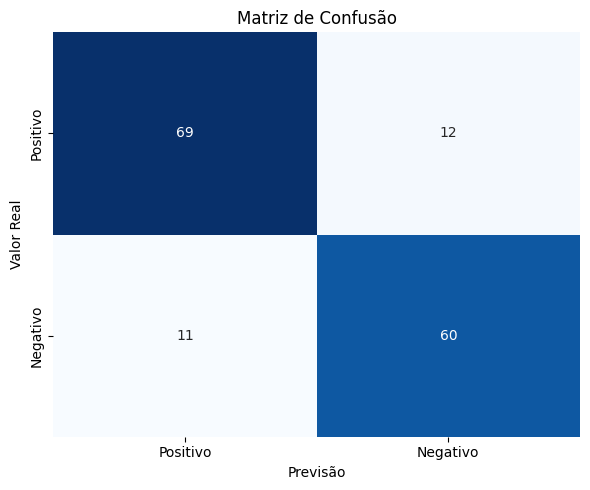

In [110]:
# Treinamento
svm_rbf = SVC(probability=True, kernel='rbf', C=1.0, gamma=2, random_state=42)
svm_rbf.fit(norm_Trx, y_train)

# Predição
y_pred = svm_rbf.predict(norm_Tsx)

TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(y_test)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()

Curva ROC do modelo não ajustado

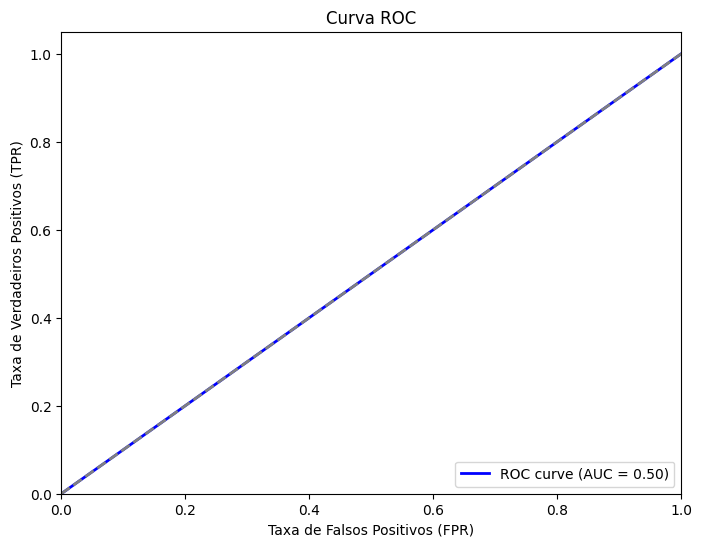

In [111]:
y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1] 

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Curva Precision-Recall do modelo não ajustado

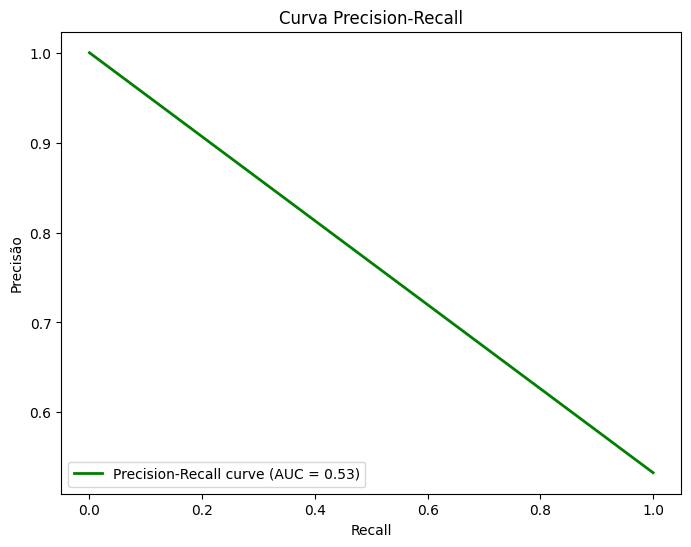

In [112]:
y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1] 

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calcular a AUC da Precision-Recall
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plotar a curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

## Grid Search

In [31]:
# Lista de parametros para o grid search
param_grid = {
    'C': [2**i for i in range(-5, 16, 2)],              
    'gamma': [2**i for i in range(-15, 4, 2)],  
    'kernel': ['rbf']                    
}

# Configurar o Grid Search com validação cruzada
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',       # Métrica para otimizar 
    cv=10,                    # Número de folds na validação cruzada
    verbose=2,                
    n_jobs=-1                 
)

In [33]:
grid_search.fit(norm_Trx, y_train)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits


C:\Users\Samsung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.03125, 0.125, 0.5, 2, 8, 32, 128, 512, 2048,
                               8192, 32768],
                         'gamma': [3.0517578125e-05, 0.0001220703125,
                                   0.00048828125, 0.001953125, 0.0078125,
                                   0.03125, 0.125, 0.5, 2, 8],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [35]:
print("Melhores parâmetros encontrados:", grid_search.best_params_)

Melhores parâmetros encontrados: {'C': 32, 'gamma': 0.125, 'kernel': 'rbf'}


Estatísticas do modelo ajustado com GridSearch

/////////////////////////////////////////////////
acuracia do modelo:  0.868421052631579
revocação do modelo:  0.8395061728395061
precisao do modelo:  0.9066666666666666
f1-score do modelo:  0.8717948717948718


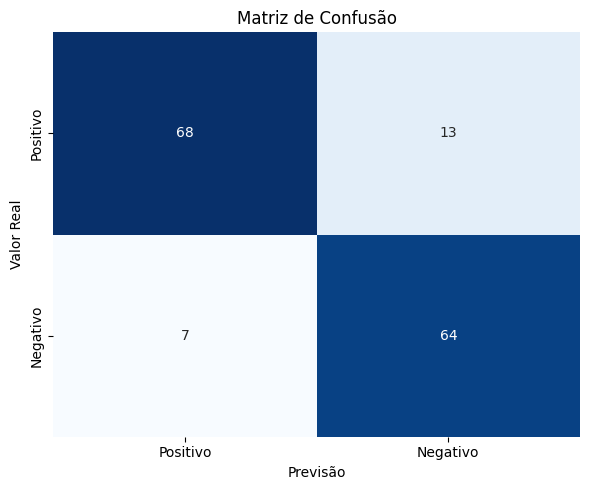

In [114]:
# Treinamento
svm_rbf = SVC(probability=True,kernel='rbf', C=32, gamma=0.125, random_state=42)
svm_rbf.fit(norm_Trx, y_train)

# Predição
y_pred = svm_rbf.predict(norm_Tsx)

TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(y_test)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()

Curva ROC do modelo com Grid Search

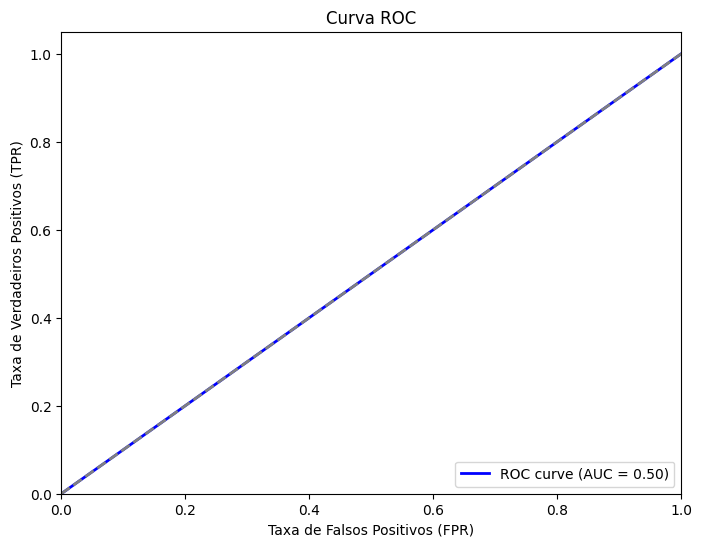

In [115]:
y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1] 

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Curva Precision-Recall do modelo com Grid Search

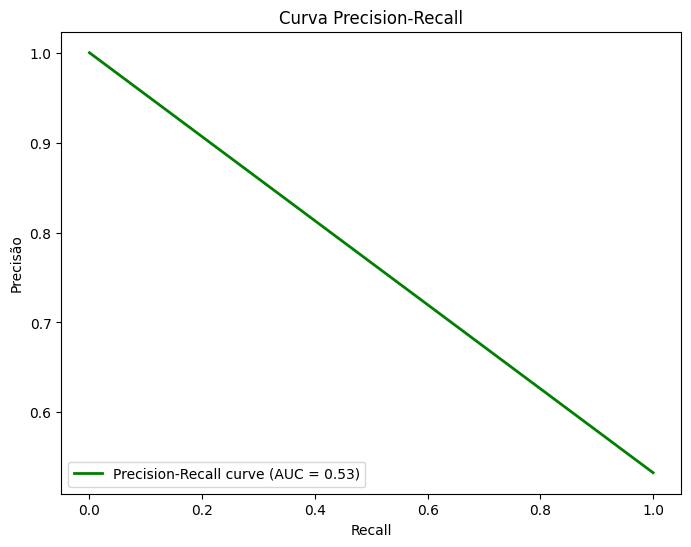

In [116]:
y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1] 

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calcular a AUC da Precision-Recall
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plotar a curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

## Optuna

In [118]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [119]:
def objective(trial):
    # Hiperparametros
    C = trial.suggest_loguniform('C', 2**-5, 2**15,)  
    gamma = trial.suggest_loguniform('gamma', 2**-15, 2**3)  
    kernel = 'rbf'
      

    # modelo
    model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True, random_state=42)

    # Avaliação com validação cruzada
    scores = cross_val_score(model, norm_Trx, y_train, cv=10, scoring='accuracy')

    return scores.mean()

In [120]:
opturne = optuna.create_study(direction='maximize')
opturne.optimize(objective, n_trials=50, n_jobs=-1)  

In [121]:
print("Melhores parâmetros:", opturne.best_params)
print("Melhor acurácia obtida:", opturne.best_value)

Melhores parâmetros: {'C': 4184.261347935534, 'gamma': 0.00023268431283865178}
Melhor acurácia obtida: 0.8756349206349207


In [122]:
best=opturne.best_params
type(best)

dict

In [123]:
best['C']

4184.261347935534

Estatísticas do modelo ajustado com Opturna

/////////////////////////////////////////////////
acuracia do modelo:  0.8355263157894737
revocação do modelo:  0.8395061728395061
precisao do modelo:  0.85
f1-score do modelo:  0.84472049689441


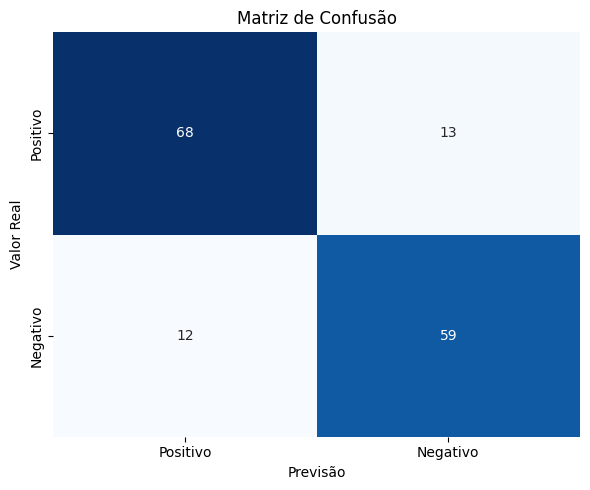

In [124]:
# Treinamento
best=opturne.best_params
svm_rbf = SVC(probability=True,kernel='rbf', C=best['C'], gamma=best['gamma'], random_state=42)
svm_rbf.fit(norm_Trx, y_train)

# Predição
y_pred = svm_rbf.predict(norm_Tsx)

TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(y_test)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()

Curva ROC do modelo com Optuna

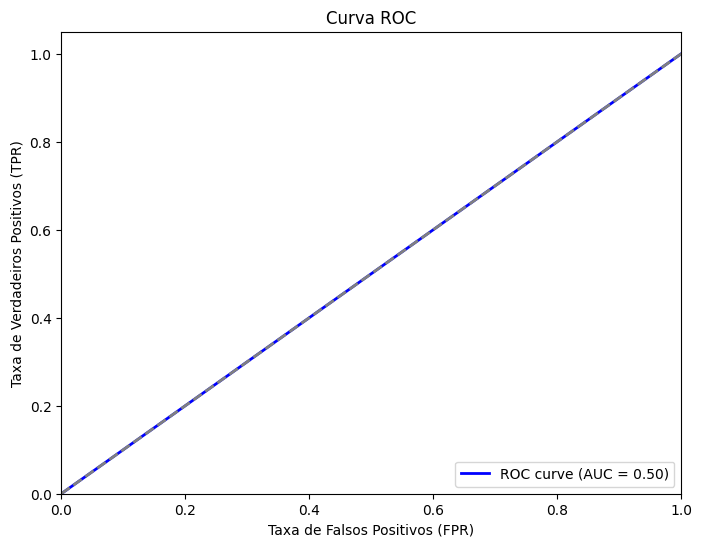

In [125]:
y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1] 

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Curva Precision-Recall do modelo com Optuna

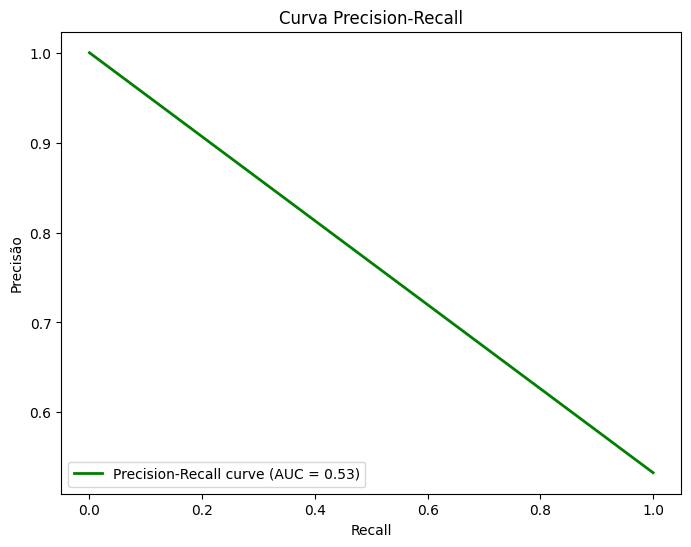

In [126]:
y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1] 

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calcular a AUC da Precision-Recall
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plotar a curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

# Decision Tree

## Modelo

In [7]:
class root_leaf():
    def __init__(self,classe,feature,limiar,gini, root=False):
        self.classe=classe
        self.feature=feature
        self.limiar=limiar
        self.gini=gini
        self.root=root
        self.go_True=None
        self.go_False=None
    
    def save_leaf(self,leaf,condition):
        if condition:
            self.go_True=leaf
        else:
            self.go_False=leaf

  

In [100]:
class Decision_tree(BaseEstimator, ClassifierMixin):
    def __init__(self,max_deep=10,min_samples=5):
        self.root=None
        self.max_deep=max_deep
        self.min_samples=min_samples


    def calculate_gini(self, data):
        # Conta a frequência de cada classe na coluna especificada
        counts = data['y'].value_counts(normalize=True)
        
        # Calcula o índice Gini
        gini = 1 - np.sum(counts**2)
        return gini
    
    def root_leaf_decision(self,data):
        data_columns=data.columns.tolist()
        rows = []

        for column in data_columns[:-1]:
            max_value = data[column].max().tolist()
            min_value = data[column].min().tolist()
            for limiar in np.arange(min_value,max_value+0.1,0.1):
                leaf_1=data[data[column]>limiar]
                leaf_2=data[data[column]<=limiar]
                leaf_1_gini=self.calculate_gini(leaf_1)
                leaf_2_gini=self.calculate_gini(leaf_2)
                gini_mean=(leaf_1_gini*(len(leaf_1)/len(data)))+(leaf_2_gini*(len(leaf_2)/len(data)))
                rows.append({'column': column, 'limiar': limiar, 'gini_mean': gini_mean})

        df_root_possibilitis = pd.DataFrame(rows)
        
        return df_root_possibilitis.nsmallest(1,'gini_mean')
    
    def make_leaf(self, root, data, depth, true_way):
        if true_way:
            leaf_data = data[data[root.feature] > root.limiar]
        else:
            leaf_data = data[data[root.feature] <= root.limiar]

        leaf_data = leaf_data.reset_index(drop=True)
        counts = leaf_data['y'].value_counts(normalize=True)
        gini_leaf = self.calculate_gini(leaf_data)

        class_0_prob = counts.get(0, 0)  # Retorna 0 se a chave não existir
        class_1_prob = counts.get(1, 0)  # Retorna 0 se a chave não existir

        if depth < self.max_deep and gini_leaf > 0 and len(leaf_data) >= self.min_samples:
            leaf_decision = self.root_leaf_decision(leaf_data)
            leaf = root_leaf(
                classe=0 if class_0_prob > class_1_prob else 1,
                feature=leaf_decision['column'].iloc[0],
                limiar=leaf_decision['limiar'].iloc[0],
                gini=gini_leaf
            )

            # Recursividade para criar subfolhas
            leaf.go_True = self.make_leaf(leaf, leaf_data, depth + 1, true_way=True)
            leaf.go_False = self.make_leaf(leaf, leaf_data, depth + 1, true_way=False)
            return leaf
        else:
            # Cria uma folha terminal
            return root_leaf(classe=0 if class_0_prob > class_1_prob else 1, feature=None, limiar=None, gini=gini_leaf)


    def fit(self, x, y):
        df_xy=pd.concat([x,y],axis=1)
        counts = df_xy['y'].value_counts(normalize=True)
        root_decision = self.root_leaf_decision(df_xy)
        gini=self.calculate_gini(df_xy)
        self.root=root_leaf(classe=0 if counts[0] > counts[1] else 1,feature=root_decision['column'].iloc[0],limiar=root_decision['limiar'].iloc[0],gini=gini,root=True)
        
       

        self.root.go_True = self.make_leaf(self.root, df_xy, depth=1, true_way=True)
        self.root.go_False = self.make_leaf(self.root, df_xy, depth=1, true_way=False)

    def predict_single(self, sample, node):
        """
        Realiza a previsão para uma única amostra.
        :param sample: Uma amostra (linha do DataFrame ou array).
        :param node: O nó atual da árvore.
        :return: Classe prevista para a amostra.
        """
        # Caso terminal (folha)
        if node.feature is None:
            return node.classe

        # Decisão com base no limiar e feature do nó atual
        if sample[node.feature] > node.limiar:
            return self.predict_single(sample, node.go_True)
        else:
            return self.predict_single(sample, node.go_False)

    def predict(self, X):
        """
        Realiza previsões para um conjunto de dados.
        :param X: DataFrame ou array com as features.
        :return: Lista de classes previstas para cada amostra.
        """
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self.predict_single(row, self.root))
        return predictions
    
    def score(self, X, y):
        # Avaliação do modelo
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def get_params(self, deep=True):
        # Retorna os parâmetros do modelo
        return {"max_deep": self.max_deep, "min_samples": self.min_samples}

    def set_params(self, **params):
        # Define os parâmetros do modelo
        for key, value in params.items():
            setattr(self, key, value)
        return self
    
    def predict_proba(self, X):
        """
        Realiza previsões de probabilidade para um conjunto de dados.
        :param X: DataFrame ou array com as features.
        :return: Probabilidades para cada amostra (classe 1).
        """
        probas = []
        for _, row in X.iterrows():
            probas.append(self.predict_proba_single(row, self.root))
        return np.array(probas)

    def predict_proba_single(self, sample, node):
        """
        Retorna a probabilidade de a amostra ser da classe 1.
        :param sample: Uma amostra (linha do DataFrame ou array).
        :param node: O nó atual da árvore.
        :return: Probabilidade da classe 1 para a amostra.
        """
        # Caso terminal (folha)
        if node.feature is None:
            # Retorna a probabilidade da classe 1 na folha
            return 1.0 if node.classe == 1 else 0.0

        # Decisão com base no limiar e feature do nó atual
        if sample[node.feature] > node.limiar:
            return self.predict_proba_single(sample, node.go_True)
        else:
            return self.predict_proba_single(sample, node.go_False)


## Experimento

### Modelo sem ajuste

/////////////////////////////////////////////////
acuracia do modelo:  0.7960526315789473
revocação do modelo:  0.7530864197530864
precisao do modelo:  0.8472222222222222
f1-score do modelo:  0.7973856209150327


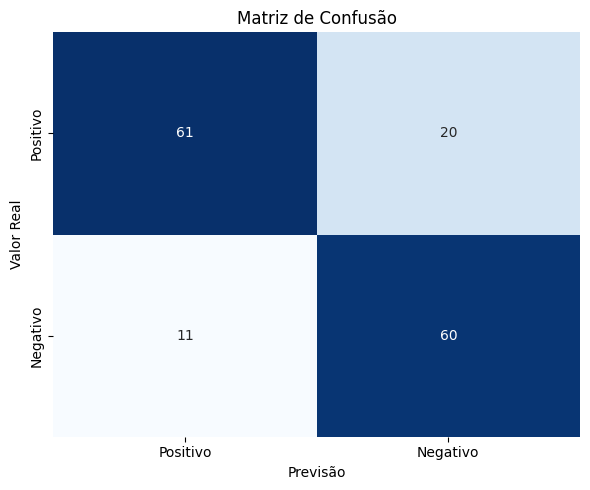

In [107]:
# Treinamento
tree=Decision_tree(7,3)
tree.fit(norm_Trx,y_train)

# Predição
y_pred = tree.predict(norm_Tsx)

TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(y_test)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()

Curva Roc do modelo não ajustado

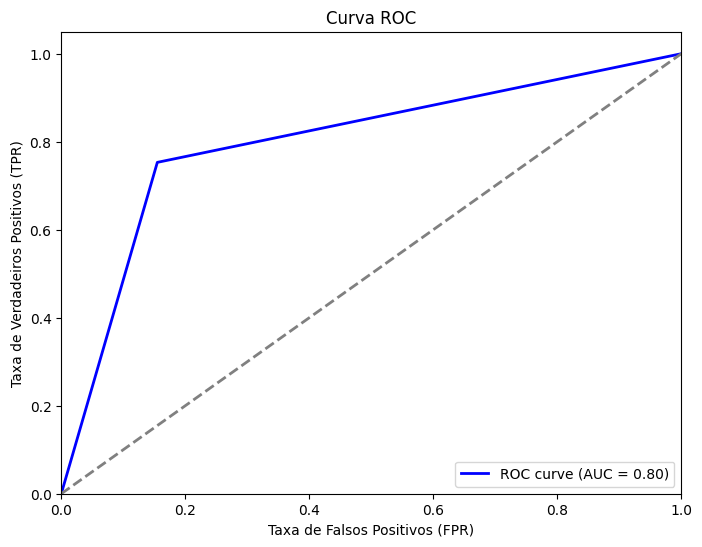

In [108]:
y_pred_prob = tree.predict_proba(norm_Tsx)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Curva Precision-Recall do modelo do modelo não ajustado

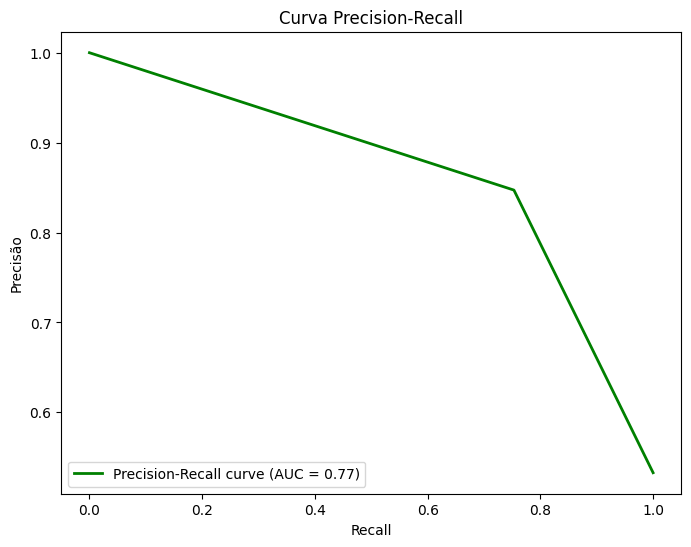

In [109]:
y_pred_prob = tree.predict_proba(norm_Tsx)

# Calcular a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calcular a AUC da Precision-Recall
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plotar a curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

### Grid Search

In [38]:
# Lista de parametros para o grid search
param_grid = {
    'max_deep': [1,2,3,4,5,6,7,8,9,10],              
    'min_samples': [1,2,3,4,5]                 
}

# Configurar o Grid Search com validação cruzada
grid_search = GridSearchCV(
    estimator=Decision_tree(),
    param_grid=param_grid,
    scoring='accuracy',       # Métrica para otimizar 
    cv=10,                    # Número de folds na validação cruzada
    verbose=2,                
    n_jobs=-1                 
)

In [39]:
grid_search.fit(norm_Trx, y_train) 

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=Decision_tree(), n_jobs=-1,
             param_grid={'max_deep': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples': [1, 2, 3, 4, 5]},
             scoring='accuracy', verbose=2)

In [42]:
print("Melhores parâmetros encontrados:", grid_search.best_params_)

Melhores parâmetros encontrados: {'max_deep': 1, 'min_samples': 1}


Estatísticas do modelo ajustado com GridSearch

/////////////////////////////////////////////////
acuracia do modelo:  0.8552631578947368
revocação do modelo:  0.9506172839506173
precisao do modelo:  0.8105263157894737
f1-score do modelo:  0.8749999999999999


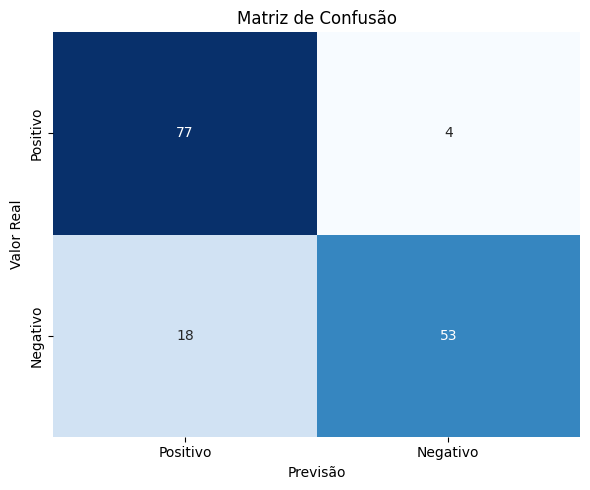

In [104]:
# Treinamento
tree=Decision_tree(1,1)
tree.fit(norm_Trx,y_train)

# Predição
y_pred = tree.predict(norm_Tsx)

TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(y_test)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()

Curva Roc do modelo com Grid Search

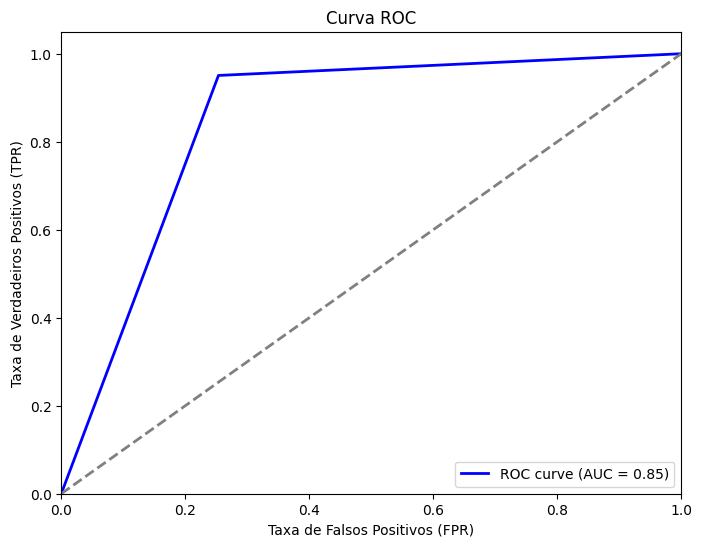

In [105]:
y_pred_prob = tree.predict_proba(norm_Tsx)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Curva Precision-Recall do modelo com Grid Search

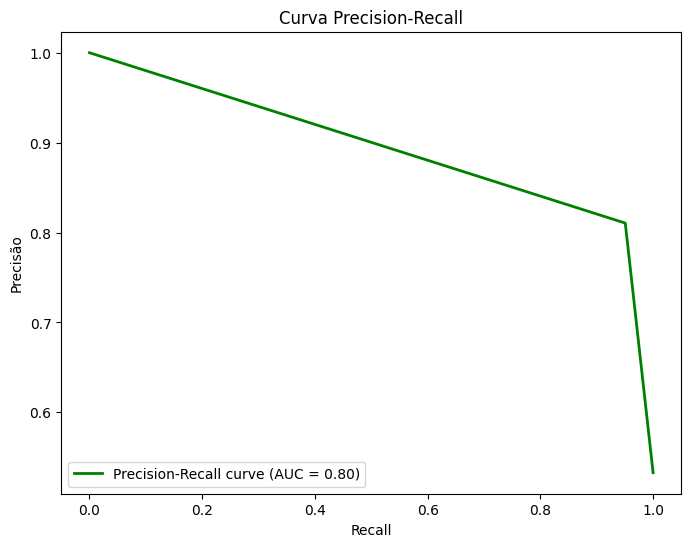

In [106]:
y_pred_prob = tree.predict_proba(norm_Tsx)

# Calcular a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calcular a AUC da Precision-Recall
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plotar a curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

### Optuna

In [90]:
def objective(trial):
    # Hiperparâmetros que o Optuna irá ajustar
    max_deep = trial.suggest_int('max_deep', 1, 10)  # Profundidade máxima entre 1 e 10
    min_samples = trial.suggest_int('min_samples', 1, 5)  # Número mínimo de amostras
    
    # Configuração do K-Fold com 10 divisões
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    fold_accuracies = []

    # Validação cruzada
    for train_index, test_index in kf.split(x):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)

        # Normalizando os dados
        norm=Nomalizer()
        norm.fit(X_train,y_train)
        norm_Trx=norm.normalize(X_train)
        norm_Tsx=norm.normalize(X_test)

        # Modelo com os hiperparâmetros sugeridos
        model = Decision_tree(max_deep=max_deep, min_samples=min_samples)
        model.fit(norm_Trx, y_train)
        
        # Avaliar no fold atual
        y_pred = model.predict(norm_Tsx)
        fold_accuracies.append(accuracy_score(y_test, y_pred))

    # Retornar a média da acurácia em todos os folds
    return np.mean(fold_accuracies)

In [91]:
# Cria o estudo e otimiza
study = optuna.create_study(direction='maximize')  # Maximiza a acurácia
study.optimize(objective, n_trials=50, n_jobs=-1)  # Faz 50 experimentos

# Resultados
print("Melhores parâmetros encontrados:", study.best_params)
print("Melhor acurácia obtida:", study.best_value)

[I 2025-01-17 16:08:04,733] A new study created in memory with name: no-name-5a26a389-54aa-4516-8b8d-f267d27f1d3f
[I 2025-01-17 16:08:12,839] Trial 0 finished with value: 0.8083529411764706 and parameters: {'max_deep': 2, 'min_samples': 4}. Best is trial 0 with value: 0.8083529411764706.
[I 2025-01-17 16:09:17,992] Trial 1 finished with value: 0.8400000000000001 and parameters: {'max_deep': 7, 'min_samples': 1}. Best is trial 1 with value: 0.8400000000000001.
[I 2025-01-17 16:10:12,499] Trial 2 finished with value: 0.8321176470588234 and parameters: {'max_deep': 6, 'min_samples': 4}. Best is trial 1 with value: 0.8400000000000001.
[I 2025-01-17 16:10:15,966] Trial 3 finished with value: 0.816078431372549 and parameters: {'max_deep': 1, 'min_samples': 4}. Best is trial 1 with value: 0.8400000000000001.
[I 2025-01-17 16:10:56,705] Trial 4 finished with value: 0.8321176470588234 and parameters: {'max_deep': 5, 'min_samples': 3}. Best is trial 1 with value: 0.8400000000000001.
[I 2025-01-1

Melhores parâmetros encontrados: {'max_deep': 10, 'min_samples': 5}
Melhor acurácia obtida: 0.851843137254902


Estatísticas do modelo ajustado com Optuna

/////////////////////////////////////////////////
acuracia do modelo:  0.8157894736842105
revocação do modelo:  0.8024691358024691
precisao do modelo:  0.8441558441558441
f1-score do modelo:  0.8227848101265822


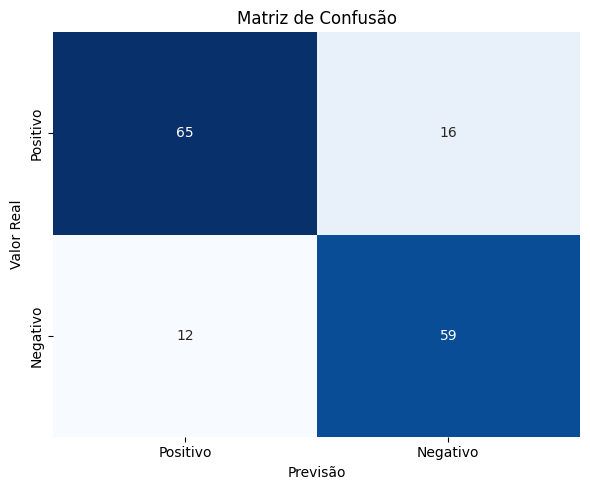

In [101]:
# Treinamento
tree=Decision_tree(10,5)
tree.fit(norm_Trx,y_train)

# Predição
y_pred = tree.predict(norm_Tsx)

TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(y_test)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()

Curva Roc do modelo com Optuna

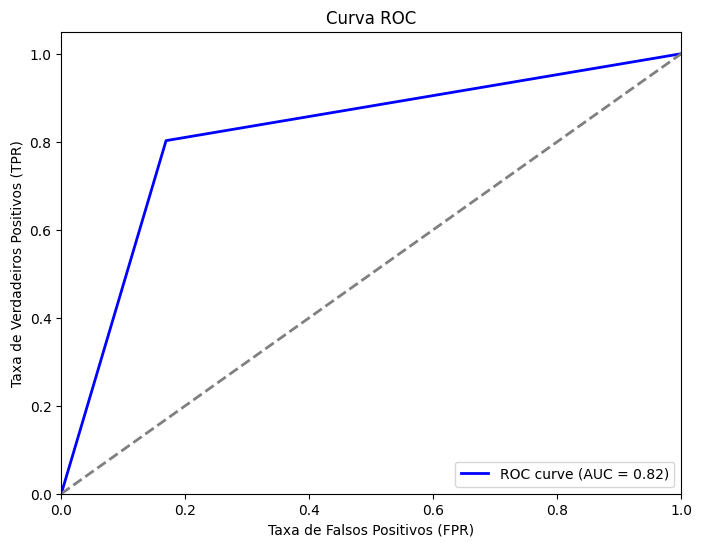

In [102]:
y_pred_prob = tree.predict_proba(norm_Tsx)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Curva Precision-Recall do modelo com Optuna

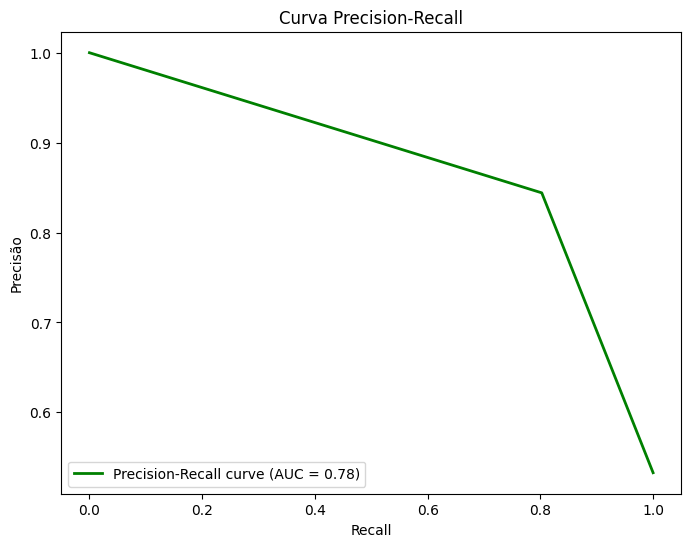

In [103]:
y_pred_prob = tree.predict_proba(norm_Tsx)

# Calcular a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calcular a AUC da Precision-Recall
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plotar a curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()